In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
apple = pd.read_csv("AAPL.csv")
apple.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600


In [23]:
apple.shape

(10468, 2)

In [5]:
print("training days =",apple.shape)

training days = (10468, 7)


In [7]:
apple.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10468 entries, 0 to 10467
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10468 non-null  object 
 1   Open       10468 non-null  float64
 2   High       10468 non-null  float64
 3   Low        10468 non-null  float64
 4   Close      10468 non-null  float64
 5   Adj Close  10468 non-null  float64
 6   Volume     10468 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 572.6+ KB


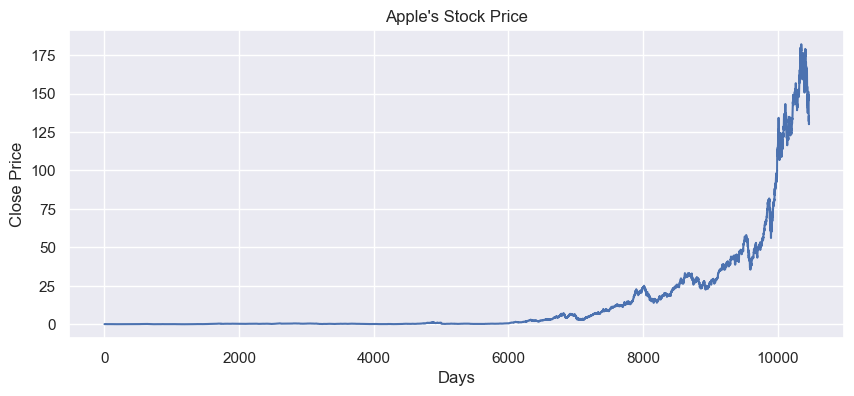

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.figure(figsize=(10, 4))
plt.title("Apple's Stock Price")
plt.xlabel("Days")
plt.ylabel("Close Price")
plt.plot(apple["Close"])
plt.show()

In [14]:
apple = apple[["Close"]]
apple.head()

,Close
0,0.128348
1,0.121652
2,0.112723
3,0.115513
4,0.118862


### Creating a variable to predict ‘X’ days in the future:

In [16]:
futureDays = 25

In [18]:
apple["Prediction"] = apple[["Close"]].shift(-futureDays)
print(apple.head())
print(apple.tail())

      Close  Prediction
0  0.128348    0.142299
1  0.121652    0.145089
2  0.112723    0.146763
3  0.115513    0.146205
4  0.118862    0.143973
            Close  Prediction
10463  131.880005         NaN
10464  132.759995         NaN
10465  135.429993         NaN
10466  130.059998         NaN
10467  131.559998         NaN


C:\Users\Admin\AppData\Local\Temp\ipykernel_10024\4162881674.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple["Prediction"] = apple[["Close"]].shift(-futureDays)


In [41]:
import numpy as np
x = apple.to_numpy()
x =(x[:-futureDays, :-1])

In [40]:
print(x.shape)
print(x.dtype)

(10443, 1)
float64


In [43]:
y = apple.to_numpy()
y =(y[:-futureDays, :-1])

### Split the data into 75% training and 25% testing

In [44]:
import pandas as pd
x = pd.DataFrame(x)
y = pd.DataFrame(y)
x, y = x.align(y, join='inner', axis=0)

In [45]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25)

### Creating Models

In [46]:
# Creating the decision tree regressor model
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor().fit(xtrain, ytrain)

# creating the Linear Regression model
from sklearn.linear_model import LinearRegression
linear = LinearRegression().fit(xtrain, ytrain)

In [47]:
xfuture = apple.drop(["Prediction"], axis=1)[:-futureDays]
xfuture = xfuture.tail(futureDays)
xfuture = np.array(xfuture)
print(xfuture)

[[172.139999]
 [170.089996]
 [165.75    ]
 [167.660004]
 [170.399994]
 [165.289993]
 [165.070007]
 [167.399994]
 [167.229996]
 [166.419998]
 [161.789993]
 [162.880005]
 [156.800003]
 [156.570007]
 [163.639999]
 [157.649994]
 [157.960007]
 [159.479996]
 [166.020004]
 [156.770004]
 [157.279999]
 [152.059998]
 [154.509995]
 [146.5     ]
 [142.559998]]


### To see the model tree prediction

In [49]:
treePrediction = tree.predict(xfuture)
print("Decision Tree prediction =",treePrediction)

Decision Tree prediction = [172.139999 170.089996 166.020004 167.660004 170.330002 165.289993
 165.119995 167.300003 167.300003 166.419998 161.789993 162.880005
 156.800003 156.570007 163.639999 157.649994 157.960007 159.479996
 166.020004 156.800003 157.279999 151.830002 154.509995 146.5
 142.559998]


### To see the model linear regression prediction

In [48]:
linearPrediction = linear.predict(xfuture)
print("Linear regression Prediction =",linearPrediction)

Linear regression Prediction = [[172.139999]
 [170.089996]
 [165.75    ]
 [167.660004]
 [170.399994]
 [165.289993]
 [165.070007]
 [167.399994]
 [167.229996]
 [166.419998]
 [161.789993]
 [162.880005]
 [156.800003]
 [156.570007]
 [163.639999]
 [157.649994]
 [157.960007]
 [159.479996]
 [166.020004]
 [156.770004]
 [157.279999]
 [152.059998]
 [154.509995]
 [146.5     ]
 [142.559998]]


### Visualize decision tree predictions

C:\Users\Admin\AppData\Local\Temp\ipykernel_10024\2779394554.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"] = predictions


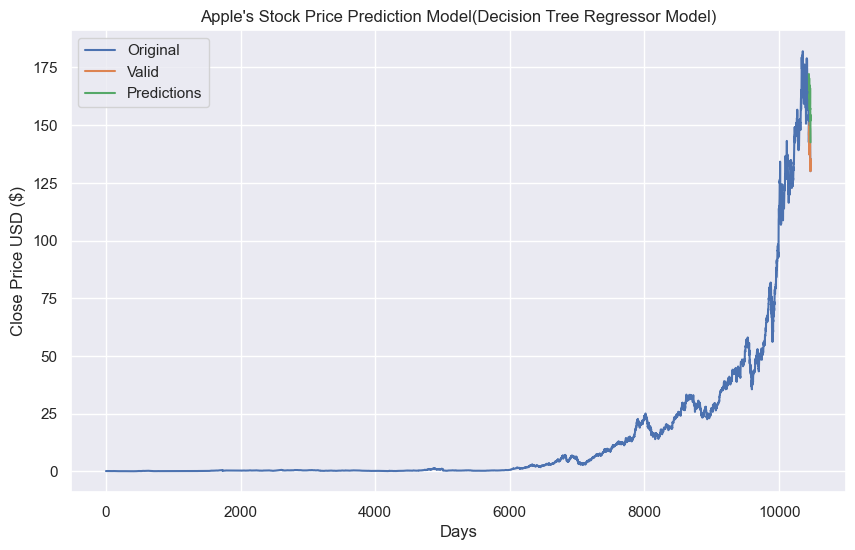

In [51]:
predictions = treePrediction
valid = apple[x.shape[0]:]
valid["Predictions"] = predictions
plt.figure(figsize=(10, 6))
plt.title("Apple's Stock Price Prediction Model(Decision Tree Regressor Model)")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(apple["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Original", "Valid", "Predictions"])
plt.show()

### Visualize the linear model predictions

C:\Users\Admin\AppData\Local\Temp\ipykernel_10024\93325786.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"] = predictions


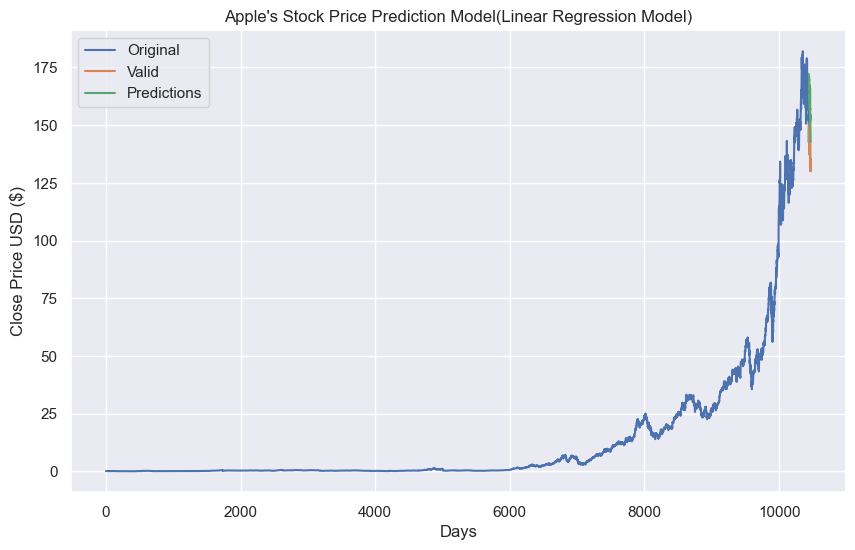

In [52]:
predictions = linearPrediction
valid = apple[x.shape[0]:]
valid["Predictions"] = predictions
plt.figure(figsize=(10, 6))
plt.title("Apple's Stock Price Prediction Model(Linear Regression Model)")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(apple["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Original", "Valid", "Predictions"])
plt.show()